In [1]:
from skimage.io import imread
from napari_workflow_optimizer import JaccardLabelImageOptimizer, Optimizer, Workflow
import pyclesperanto_prototype as cle

/Users/haase/code/pyclesperanto_prototype/pyclesperanto_prototype/_tier0/_pycl.py:30: UserWarning: Data type double is not supported by your GPU. Will use float instead.
  warnings.warn("Data type double is not supported by your GPU. Will use float instead.")


In [2]:
w = Workflow()
# define background subtraction
w.set("deblurred", cle.gaussian_blur, "input", sigma_x=5, sigma_y=5)
# define segmentation
w.set("binarized", cle.threshold_otsu, "deblurred")
w.set("labeled", cle.label, "binarized")

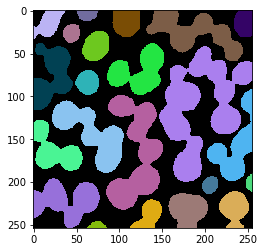

In [3]:
w.set("input", imread("/Users/haase/data/blobs.tif"))
result = w.get("labeled")

cle.imshow(result, labels=True)

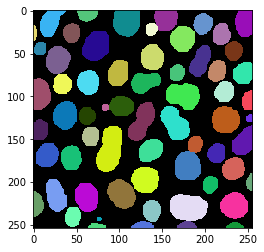

In [4]:
ground_truth = imread("/Users/haase/data/blobs_labeled.tif")
cle.imshow(ground_truth, labels=True)

 final_simplex: (array([[-2.57117817,  3.07498857,  0.00319218],
       [-2.52941625,  3.03286465,  0.00334455],
       [-1.89824976,  3.02270995,  0.0030759 ],
       [-2.49756558,  3.00336109,  0.00330068]]), array([-0.68798562, -0.687528  , -0.6873711 , -0.68725163]))
           fun: -0.6879856237928642
       message: 'Maximum number of iterations has been exceeded.'
          nfev: 39
           nit: 20
        status: 2
       success: False
             x: array([-2.57117817,  3.07498857,  0.00319218])


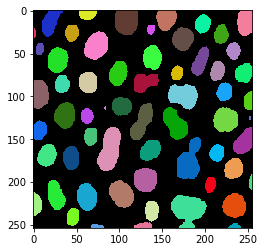

In [5]:
jlio = JaccardLabelImageOptimizer(w)
best_param = jlio.optimize("labeled", ground_truth, maxiter=20)
jlio.set_numeric_parameters(best_param)
cle.imshow(w.get("labeled"), labels=True)

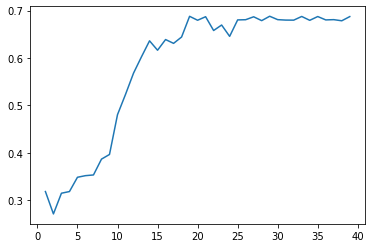

In [6]:
import matplotlib.pyplot as plt
attempt, quality = jlio.get_plot()

plt.plot(attempt, quality)